In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types , cut_dfs_generic_Vpi0eta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DRAW with respect to generic bkg

In [5]:
base_file_loc = '/media/jykim/T7/storage/Ntuples_ghi/Generic_Ntuples/ref_pre_ref_only_skim/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [6]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05'

variables=['D0_M','Dstarp_CMS_p','Dstarp_delM','Dstarp_isSignal']
#,'D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Dstarp_chiProb']
# variables += ['dM_pi0_50MeV', 'dM_pi0_75MeV']

tree='ref_rho'

In [7]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [25]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)

[46040. 44749. 44707. 43860. 43832. 43908. 44354. 44788. 45544. 46832.
 49638. 52125. 55965. 61567. 67598. 63231. 43896. 34164. 31898. 31324.
 30739. 30851. 31274. 35610. 64944. 64112. 32781. 28033. 26851. 26216.
 25873. 25728. 24801. 24804. 24568. 24208. 24020. 23372. 23024. 22988.
 22764. 22595. 22086. 21808. 21498. 21278. 21055. 20676. 20100. 19983.]
fitst_bin_entries=46040.0


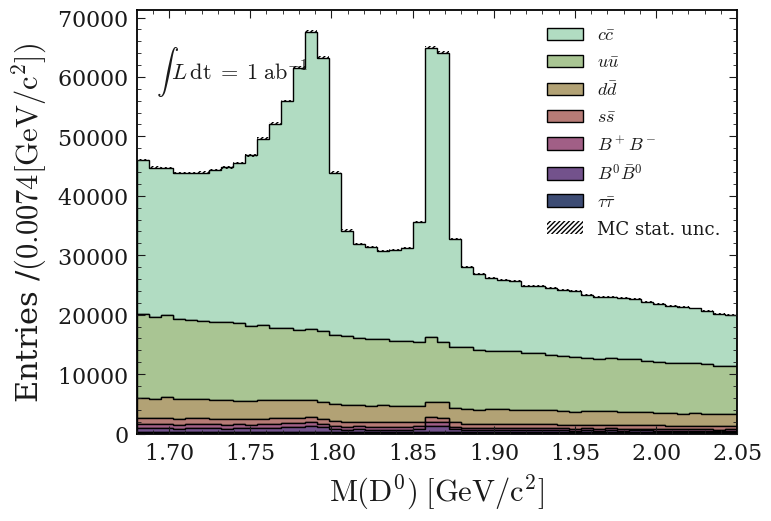

In [26]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)
# xrange = (1.75,2.0)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1,luminosity='$1\\; \\mathrm{ab}^{-1}$')

plt.tight_layout()
plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_D0_M.png")

In [27]:
cut = 'gamma_E>0.0'
cut = 'dM_pi0_75MeV  > 0.023'
cut = 'D0_M>0.0'
cut = 'abs((Dstarp_delM-0.1455))<0.0005 & Dstarp_CMS_p>2.5'
cut = 'abs((Dstarp_delM-0.1455))<0.0005'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[ 3068.  2910.  2909.  2901.  2890.  3210.  3271.  3537.  3917.  4485.
  5213.  6464.  8017. 10451. 13130. 12507.  5821.  2463.  1927.  1836.
  1832.  2164.  2798.  7154. 32784. 32881.  5858.  2014.  1448.  1358.
  1276.  1199.  1178.  1120.  1110.  1125.  1105.  1080.  1100.  1010.
  1047.  1026.   991.   987.   955.   935.   905.   942.   873.   800.]
fitst_bin_entries=3068.0


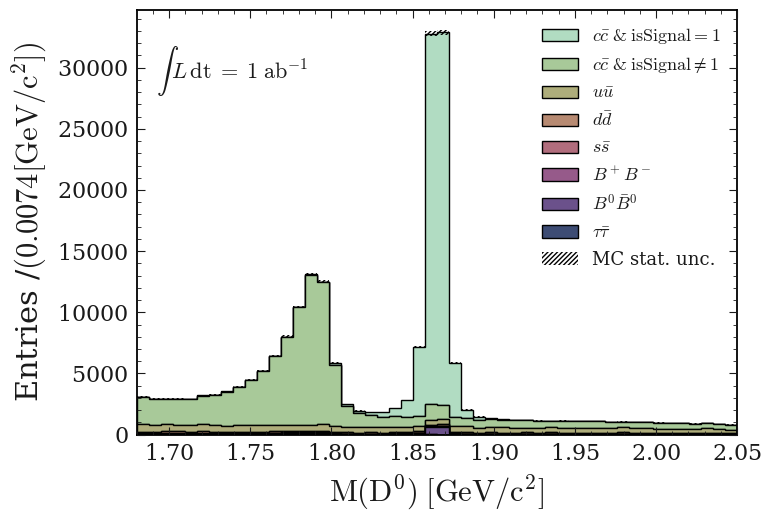

In [28]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'D0_M'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.72,1.95)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$', ncol=1)

plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_D0_M.png")
plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_D0_M.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_DstarCMSpcut_D0_M_narrow_range.png")

[   0.    0.    0.    0.    0.    0.    0.    0. 4837. 7130. 6958. 6770.
 6851. 6729. 6617. 6396. 6432. 6307. 6114. 5885. 5790. 5590. 5332. 5162.
 5072. 4864. 4696. 4433. 4369. 4119. 4032. 3883. 3501. 3352. 3192. 3092.
 2822. 2524. 2456. 2238. 2084. 1795. 1687. 1461. 1199.  903.  631.  289.
   35.   11.]
fitst_bin_entries=0.0


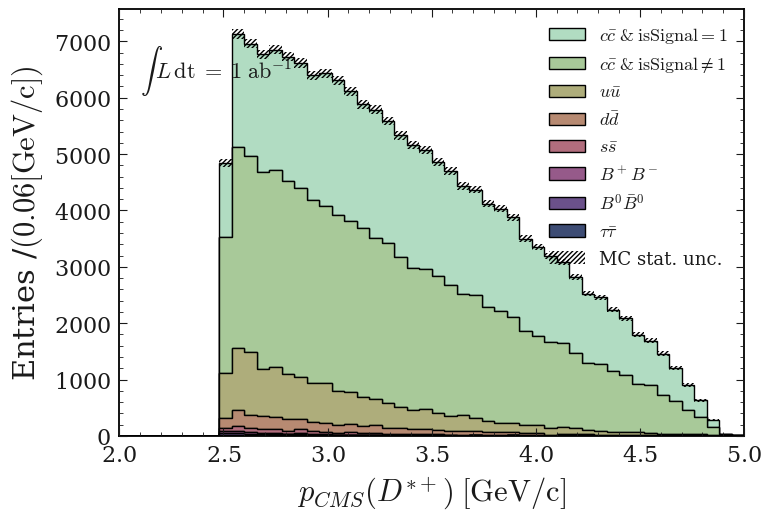

In [24]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'Dstarp_CMS_p'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (2, 5)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c]",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=1,force_range=xrange)
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_Dstarp_CMS_p.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_Dstarp_CMS_p.png")
plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_DstarCMSpcut_Dstarp_CMS_p.png")




[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 2.00000e+00 1.00000e+00 6.11200e+03 1.30520e+04 1.71610e+04
 2.00500e+04 2.28220e+04 2.51700e+04 2.78580e+04 3.29560e+04 4.25570e+04
 5.87480e+04 6.79030e+04 1.17694e+05 9.42880e+04 6.91670e+04 6.22550e+04
 5.18420e+04 4.46280e+04 4.17170e+04 3.98590e+04 3.92250e+04 3.88220e+04
 3.93110e+04 4.00070e+04 4.03520e+04 4.03170e+04 4.07390e+04 4.11080e+04
 4.13920e+04 4.14940e+04 4.19110e+04 4.19690e+04 4.20190e+04 4.21890e+04
 4.27490e+04 4.23780e+04 4.23140e+04 4.21970e+04 4.19650e+04 4.02180e+04
 3.69840e+04 2.78530e+04]
fitst_bin_entries=0.0


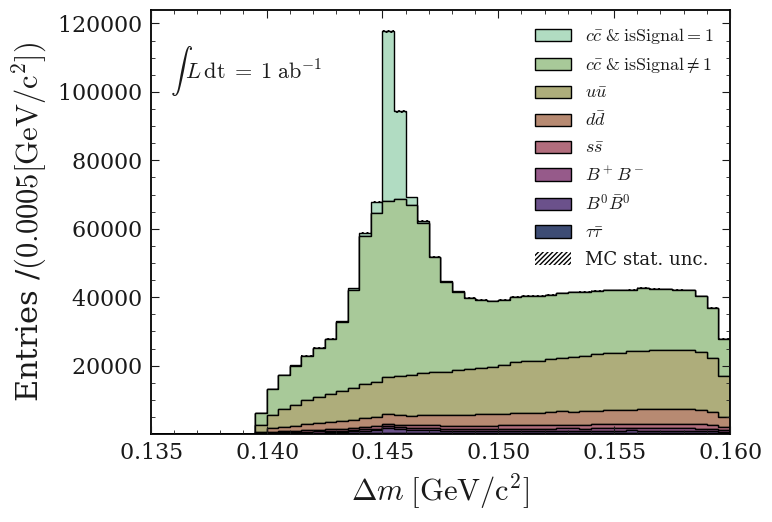

In [16]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'Dstarp_delM'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (0.135,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\Delta m$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$', force_range=xrange,  ncol=1)
plt.tight_layout()
plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_Dstarp_delM.png")

[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 2.00000e+00 1.00000e+00 6.11200e+03 1.30520e+04 1.71610e+04
 2.00500e+04 2.28220e+04 2.51700e+04 2.78580e+04 3.29560e+04 4.25570e+04
 5.87480e+04 6.79030e+04 1.17694e+05 9.42880e+04 6.91670e+04 6.22550e+04
 5.18420e+04 4.46280e+04 4.17170e+04 3.98590e+04 3.92250e+04 3.88220e+04
 3.93110e+04 4.00070e+04 4.03520e+04 4.03170e+04 4.07390e+04 4.11080e+04
 4.13920e+04 4.14940e+04 4.19110e+04 4.19690e+04 4.20190e+04 4.21890e+04
 4.27490e+04 4.23780e+04 4.23140e+04 4.21970e+04 4.19650e+04 4.02180e+04
 3.69840e+04 2.78530e+04]
fitst_bin_entries=0.0


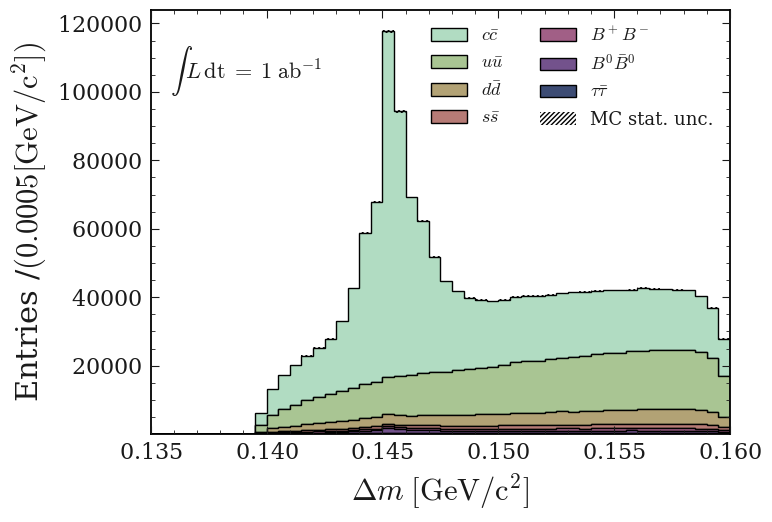

In [17]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (0.135,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\Delta m$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$' , force_range=xrange)